In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat

In [2]:
df=pd.read_csv("carmenenero.csv", header=int(0))

In [3]:
df.head()

,anio,mes,dia,hora(utc),altura(mm)
0,2016,1,1,0,289
1,2016,1,1,1,323
2,2016,1,1,2,337
3,2016,1,1,3,331
4,2016,1,1,4,309


In [4]:
df.columns = ['año', 'mes','dia','hora','altura']

In [5]:
from datetime import datetime
df['Date Time']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'año'],x[u'mes'], x[u'dia'], x[u'hora']), "%Y %m %d %H"),axis=1)

In [6]:
df.head()

,año,mes,dia,hora,altura,Date Time
0,2016,1,1,0,289,2016-01-01 00:00:00
1,2016,1,1,1,323,2016-01-01 01:00:00
2,2016,1,1,2,337,2016-01-01 02:00:00
3,2016,1,1,3,331,2016-01-01 03:00:00
4,2016,1,1,4,309,2016-01-01 04:00:00


In [7]:
df.columns = ['año', 'mes','dia','hora','altura','Date Time']

In [8]:
df.dtypes

año                   int64
mes                   int64
dia                   int64
hora                  int64
altura                int64
Date Time    datetime64[ns]
dtype: object

In [9]:
df1= df.loc[:, 'altura':'Date Time']

In [10]:
df1.head()

,altura,Date Time
0,289,2016-01-01 00:00:00
1,323,2016-01-01 01:00:00
2,337,2016-01-01 02:00:00
3,331,2016-01-01 03:00:00
4,309,2016-01-01 04:00:00


In [11]:
df1.tail()

,altura,Date Time
739,175,2016-01-31 19:00:00
740,187,2016-01-31 20:00:00
741,209,2016-01-31 21:00:00
742,237,2016-01-31 22:00:00
743,263,2016-01-31 23:00:00


In [12]:
df1.dtypes

altura                int64
Date Time    datetime64[ns]
dtype: object

C:\Users\tzitzin\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


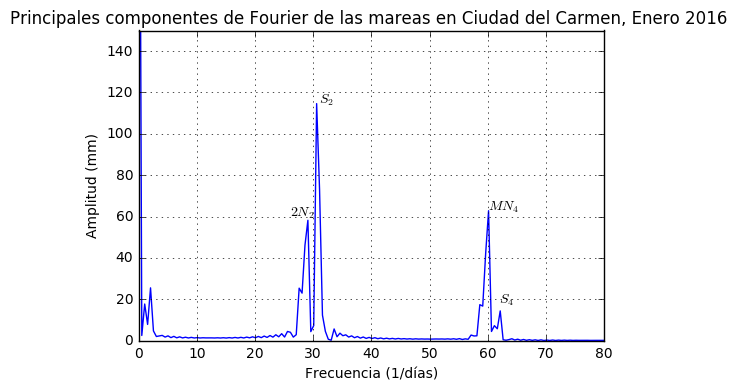

In [13]:
import numpy as np
from scipy.fftpack import rfft
N=744.0
T=1.0/372.0
x=df1[u'Date Time']
y=df1[u'altura']
yf=rfft(y)
xf=np.linspace(0.0,1.0/(2.0*T),N/2)
import matplotlib.pyplot as plt
plt.plot(xf,2.0/N* np.abs(yf[0:N/2]))
plt.xlim(0,80)
plt.ylim(0,150)
plt.grid()
plt.title("Principales componentes de Fourier de las mareas en Ciudad del Carmen, Enero 2016 ")
plt.ylabel('Amplitud (mm)')
plt.xlabel('Frecuencia (1/días)')
plt.text(26, 60, '$2N_2$')
plt.text(31, 115, '$S_2$')
plt.text(60, 63, '$MN_4$')
plt.text(62, 18, '$S_4$')
plt.show()

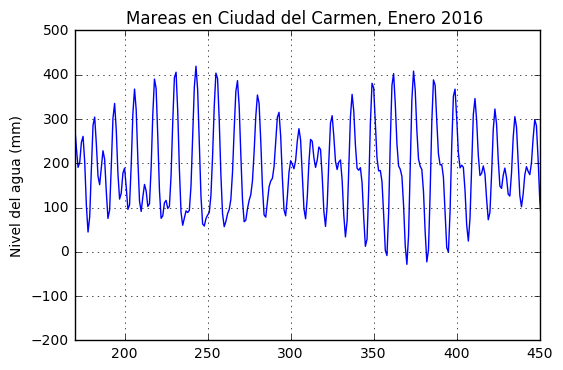

In [14]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot 

# Función cuadrática. 
def f1(x): 
    return 190+55*math.sin(2*3.1416*x/13.2857)+115*math.sin(2*3.1416*x/12)+65*math.sin(2*3.1416*x/6.2)+18*math.sin(2*3.1416*x/6)
# Función lineal. 

# Valores del eje X que toma el gráfico. 
x = range(0, 800) 
 
# Graficar ambas funciones. 
pyplot.plot(x, [f1(i) for i in x]) 
plt.title("Mareas en Ciudad del Carmen, Enero 2016 ")
plt.ylabel('Nivel del agua (mm)')

# Límites ejes 
pyplot.xlim(170, 450) 
pyplot.ylim(-200, 500) 

plt.grid(True) 
pyplot.show()

In [44]:
# Función cuadrática. 
def f13(x): 
    return 190+55*math.sin(2*3.1416*x/13.2857)+115*math.sin(2*3.1416*x/12)+65*math.sin(2*3.1416*x/6.2)+18*math.sin(2*3.1416*x/6)
#interpolar la funcion
#df1[u'altura'] = df1[u'altura'].astype(float).interpolate(method='spline', order=2)


#error relativo
x =  (np.abs(df1[u'altura'] - f13(df1[u'Date Time'])))**2
y =  (np.abs(df1[u'altura']))**2

er = x/y

er.sum()
er

TypeError: cannot operate on a series without a rhs of a series/ndarray of type datetime64[ns] or a timedelta